In [1]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

Text(0,0.5,'memory [MB]')

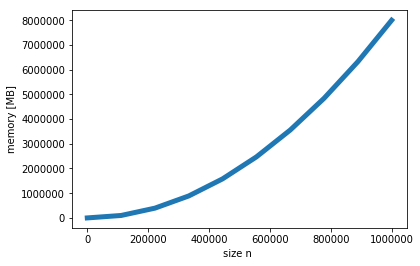

In [5]:
x = np.linspace(0,1e6,10)
plt.plot(x,8*(x**2)/1e6,lw=5)
plt.xlabel('size n ')
plt.ylabel('memory [MB]')


storage 
- csc_matrix : compressed sparsed column
- csr_matrix : compressed sparsed row
- bsr_matrix : block sparsed row 
- lil_matrix : list of lists
- dok_matrix : dictionary of keys
- coo_matrix : COOridante format
- dia_matrix : DIAgonal 

In [2]:
import scipy.sparse as sps
import matplotlib.pyplot as plt

- default arithmetic operations -- `csr_matrix`
- attributs:
    - mtx.A ==> mtx.toarray()
    - mtx.T ==> transpose
    - mtx.H ==> Hermitian
    - mtx.shape ==> num_rows * num_cols (tuples)
    - mtx.size ==> nums of nonzeros


_____

### coo format

- (i,j,v) 
- data[i] is value at (row[i],col[i]) position

PROS :
- fast to construct sparse matrices
- fast conversion to and from **CSR/CSC** format
- fast matrix\* vector

CONS:
- no slicing, no arithmetics

In [3]:
## create empty coo matrix
mtx = sps.coo_matrix((3,4),dtype=np.int8)
mtx.A

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [4]:
## using (data,ij)
row = np.array([0, 3, 1, 0])
col = np.array([0, 3, 1, 2])
data = np.array([4, 5, 7, 9])
mtx = sps.coo_matrix((data,(row,col)),shape = (4,4))
mtx.todense()

matrix([[4, 0, 9, 0],
        [0, 7, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 5]])

In [13]:
mtx

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>

In [9]:
mtx*mtx.A # matrix product , not element-wise product(in numpy)

array([[16,  0, 36,  0],
       [ 0, 49,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0, 25]], dtype=int64)

In [14]:
# duplicated entries summed together
row = np.array([0, 0, 1, 3, 1, 0, 0])
col = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])
mtx = sps.coo_matrix((data,(row,col)),shape = (4,4))
mtx.A

array([[3, 0, 1, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]])

In [18]:
mtx[2,1] # no slicing

TypeError: 'coo_matrix' object is not subscriptable

_____
## CSR 

- row oriented 
    - indices, indptr, data
    - *indices* is array of column indices
    - *indptr* points to row starts in *indices* and data
    
    

In [23]:
## using (data,ij)
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
mtx = sps.csr_matrix((data,(row,col)),shape = (4,4))
mtx.todense()

matrix([[1, 0, 2, 0],
        [0, 0, 3, 0],
        [4, 5, 6, 0],
        [0, 0, 0, 0]], dtype=int64)

In [24]:
mtx.data

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [25]:
mtx.indices

array([0, 2, 2, 0, 1, 2], dtype=int32)

In [28]:
indptr = mtx.indptr
indptr

array([0, 2, 3, 6, 6], dtype=int32)

In [33]:
row1 = mtx.data[indptr[0]:indptr[1]] ## row1 
row2 = mtx.data[indptr[1]:indptr[2]] ## row2
row3 = mtx.data[indptr[2]:indptr[3]] ## row3
print(row1,row2,row3)

[1 2] [3] [4 5 6]
